In [59]:
import seaborn as sns
import pandas as pd

sheet1, sheet2 = None, None
with pd.ExcelFile(
    "/home/erika.kvalem/Documents/Relecov/relecov_qc_exercise/files/QC_final.xlsx"
) as reader:
    df = pd.read_excel(reader, sheet_name="resultados", index_col=0)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, COD_2102 to COD_2143
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sample ID                         400 non-null    object 
 1   Protocolo diagnostico SARS-CoV-2  390 non-null    object 
 2   var_protocolo_diagnostico         390 non-null    object 
 3   Variante                          355 non-null    object 
 4   Asignacion de Linaje              384 non-null    object 
 5   Version Pango                     394 non-null    object 
 6   Valor Ct PCR                      280 non-null    float64
 7   Valor Ct N                        60 non-null     float64
 8   Valor Ct ORF                      30 non-null     float64
 9   Valor Ct S                        35 non-null     float64
 10  var_readcount                     389 non-null    float64
 11  var_qcfiltered                    253 non-null    float64
 12  v

# 1 gráfica

In [61]:
df

,Sample ID,Protocolo diagnostico SARS-CoV-2,var_protocolo_diagnostico,Variante,Asignacion de Linaje,Version Pango,Valor Ct PCR,Valor Ct N,Valor Ct ORF,Valor Ct S,...,var_qcfiltered,var_readhost,var_readsvirus,var_unmapped,var_QC>10x,var_mean_depth_coverage,var_n_Ns,var_number_variants_75,var_variantseffect,var_referencegenomeaccession
ID,,,,,,,,,,,,,,,,,,,,,
COD_2102,#1,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,B.1.1.7,"20I (Alpha, V1)",2017-01-03 00:00:00,NaN,16.0,19.0,19.0,...,99.90,0.1,99.90,1.0000,99.00,2877.000,NaN,36.0,28.0,MN908947
COD_2102,#2,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,B.1.351,"20H (Beta, V2)",2017-01-03 00:00:00,NaN,15.0,18.0,18.0,...,99.90,0.1,99.90,1.0000,99.00,2800.000,NaN,28.0,26.0,MN908947
COD_2102,#3,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,A.28,19B,2017-01-03 00:00:00,NaN,18.0,20.0,19.0,...,99.90,0.1,99.90,1.0000,99.00,2494.000,NaN,25.0,17.0,MN908947
COD_2102,#4,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,B.1.621,21H (Mu),2017-01-03 00:00:00,NaN,18.0,20.0,21.0,...,99.90,0.1,99.90,1.0000,99.00,2217.000,NaN,37.0,28.0,MN908947
COD_2102,#5,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,P.1,"20J (Gamma, V3)",2017-01-03 00:00:00,NaN,18.0,21.0,22.0,...,99.90,0.1,99.90,1.0000,99.00,1041.000,NaN,37.0,30.0,MN908947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COD_2143,#6,in house RT-qPCR,in house RT-qPCR,Delta (B.1.617.2-like),AY.9.2,3.1.17,25.2,NaN,NaN,NaN,...,89.55,NaN,99.94,0.0006,95.55,3.923,0.0,37.0,25.0,NC_045512.2
COD_2143,#7,in house RT-qPCR,in house RT-qPCR,Delta (B.1.617.2-like),AY.43,3.1.17,26.3,NaN,NaN,NaN,...,89.96,NaN,99.97,0.0003,95.95,3.934,0.0,41.0,30.0,NC_045512.2
COD_2143,#8,in house RT-qPCR,in house RT-qPCR,Delta (B.1.617.2-like),AY.94,3.1.17,21.1,NaN,NaN,NaN,...,89.71,NaN,99.96,0.0004,95.95,2.745,0.0,42.0,30.0,NC_045512.2


In [4]:

data = [df["ID"],df["Sample ID"], df["var_readcount"],df["var_qcfiltered"]]

headers = ["ID","sample_id","var_readcount","var_qcfiltered"]

df2 = pd.concat(data, axis=1, keys=headers)



In [5]:
df2['reads_post_trimming'] = df2['var_readcount']*df2['var_qcfiltered'] /100

In [6]:
df2.isnull().sum()

ID                       0
sample_id                0
var_readcount           11
var_qcfiltered         147
reads_post_trimming    147
dtype: int64

In [73]:
data = df[["var_readcount"]]

In [74]:
data

,var_readcount
ID,
COD_2102,682115.0
COD_2102,680035.0
COD_2102,591253.0
COD_2102,525910.0
COD_2102,247292.0
...,...
COD_2143,621207.0
COD_2143,606958.0
COD_2143,460721.0


In [70]:
df1_transposed = data.T

In [71]:
df1_transposed

ID,COD_2102,COD_2102,COD_2102,COD_2102,COD_2102,COD_2102,COD_2102,COD_2102,COD_2102,COD_2102,...,COD_2143,COD_2143,COD_2143,COD_2143,COD_2143,COD_2143,COD_2143,COD_2143,COD_2143,COD_2143
var_readcount,682115.0,680035.0,591253.0,525910.0,247292.0,431544.0,3678.0,477610.0,466440.0,1187986.0,...,1116390.0,613882.0,832109.0,742525.0,882435.0,621207.0,606958.0,460721.0,607880.0,809170.0


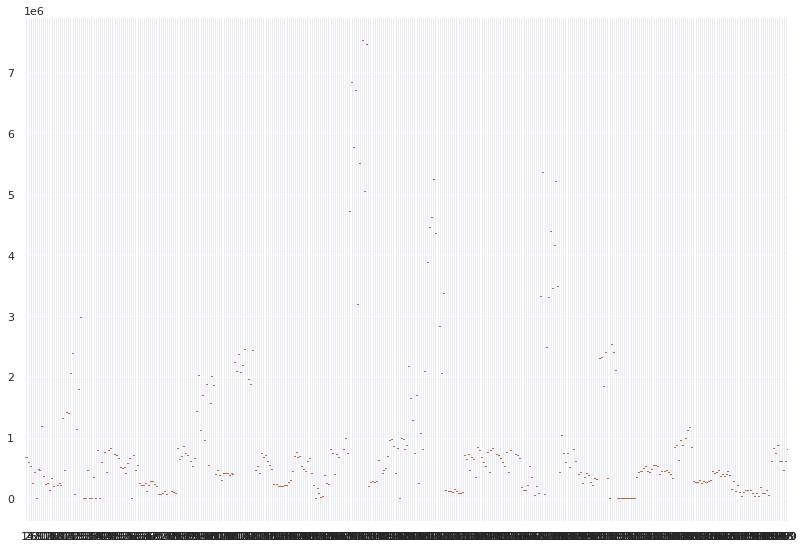

In [72]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()
ax.boxplot(df1_transposed)
plt.show()

# Valores nulos

In [8]:
df2.isna().sum()

ID                       0
sample_id                0
var_readcount           11
var_qcfiltered         147
reads_post_trimming    147
dtype: int64

In [11]:
df2.dropna( subset = ['var_qcfiltered'], inplace = True )

df2= df2.astype({'var_qcfiltered': int})

In [9]:
data = [df2["ID"],df2["sample_id"],df2["var_unmapped"]]

headers = ["ID","sample_id","var_unmapped"]

sub_dataf = pd.concat(data, axis=1, keys=headers)

KeyError: 'var_unmapped'

In [10]:
nan_df = sub_dataf[sub_dataf['var_unmapped'].isna()]

NameError: name 'sub_dataf' is not defined

In [11]:
nan_df

NameError: name 'nan_df' is not defined

In [397]:
nan_df.drop(columns=['var_unmapped'], inplace = True)

/home/erika.kvalem/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [398]:
nan_df.groupby(['ID']).count()

,sample_id
ID,
COD_2103,1
COD_2104,10
COD_2106,1
COD_2107_2,10
COD_2108,1
COD_2110,10
COD_2111,1
COD_2116,1
COD_2117,1


In [99]:
df2

,ID,sample_id,var_readcount,var_qcfiltered,reads_post_trimming
0,COD_2102,#1,682115.000,99.900000,6.814329e+05
1,COD_2102,#2,680035.000,99.900000,6.793550e+05
2,COD_2102,#3,591253.000,99.900000,5.906617e+05
3,COD_2102,#4,525910.000,99.900000,5.253841e+05
4,COD_2102,#5,247292.000,99.900000,2.470447e+05
5,COD_2102,#6,431544.000,99.900000,4.311125e+05
6,COD_2102,#7,3678.000,99.900000,3.674322e+03
7,COD_2102,#8,477610.000,99.900000,4.771324e+05
8,COD_2102,#9,466440.000,99.900000,4.659736e+05
9,COD_2102,#10,1187986.000,99.900000,1.186798e+06


In [102]:
df

,Sample ID,Protocolo diagnostico SARS-CoV-2,var_protocolo_diagnostico,Variante,Asignacion de Linaje,Version Pango,Valor Ct PCR,Valor Ct N,Valor Ct ORF,Valor Ct S,...,var_qcfiltered,var_readhost,var_readsvirus,var_unmapped,var_QC>10x,var_mean_depth_coverage,var_n_Ns,var_number_variants_75,var_variantseffect,var_referencegenomeaccession
ID,,,,,,,,,,,,,,,,,,,,,
COD_2102,#1,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,B.1.1.7,"20I (Alpha, V1)",2017-01-03 00:00:00,NaN,16.00,19.00,19.00,...,99.900000,0.100000,99.900000,1.000000,99.0000,2877.000000,NaN,36.0,28.0,MN908947
COD_2102,#2,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,B.1.351,"20H (Beta, V2)",2017-01-03 00:00:00,NaN,15.00,18.00,18.00,...,99.900000,0.100000,99.900000,1.000000,99.0000,2800.000000,NaN,28.0,26.0,MN908947
COD_2102,#3,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,A.28,19B,2017-01-03 00:00:00,NaN,18.00,20.00,19.00,...,99.900000,0.100000,99.900000,1.000000,99.0000,2494.000000,NaN,25.0,17.0,MN908947
COD_2102,#4,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,B.1.621,21H (Mu),2017-01-03 00:00:00,NaN,18.00,20.00,21.00,...,99.900000,0.100000,99.900000,1.000000,99.0000,2217.000000,NaN,37.0,28.0,MN908947
COD_2102,#5,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,P.1,"20J (Gamma, V3)",2017-01-03 00:00:00,NaN,18.00,21.00,22.00,...,99.900000,0.100000,99.900000,1.000000,99.0000,1041.000000,NaN,37.0,30.0,MN908947
COD_2102,#6,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,AY.9.2,21I (Delta),2017-01-03 00:00:00,NaN,23.00,26.00,NaN,...,99.900000,0.100000,99.900000,1.000000,99.0000,1818.000000,NaN,37.0,34.0,MN908947
COD_2102,#7,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,None,None,2017-01-03 00:00:00,NaN,23.00,26.00,36.00,...,99.900000,4.800000,95.200000,0.460000,99.0000,13.000000,NaN,NaN,NaN,MN908947
COD_2102,#8,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,AY.94,21J (Delta),2017-01-03 00:00:00,NaN,16.00,19.00,NaN,...,99.900000,0.100000,99.900000,1.000000,99.0000,2013.000000,NaN,44.0,39.0,MN908947
COD_2102,#9,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,AY.94,21J (Delta),2017-01-03 00:00:00,NaN,14.00,17.00,NaN,...,99.900000,0.100000,99.900000,1.000000,99.0000,1967.000000,NaN,44.0,39.0,MN908947


In [109]:
data = df2.sort_values("reads_post_trimming",na_position='last')


In [110]:
data

,ID,sample_id,var_readcount,var_qcfiltered,reads_post_trimming
152,COD_2115,#3,62.246,98.410000,6.125629e+01
316,COD_2132,#7,180.000,81.070000,1.459260e+02
315,COD_2132,#6,419.000,88.020000,3.688038e+02
312,COD_2132,#3,755.000,95.980000,7.246490e+02
310,COD_2132,#1,884.000,91.060000,8.049704e+02
319,COD_2132,#10,1035.000,89.090000,9.220815e+02
313,COD_2132,#4,1106.000,89.500000,9.898700e+02
314,COD_2132,#5,1089.000,91.470000,9.961083e+02
318,COD_2132,#9,1066.000,94.550000,1.007903e+03
311,COD_2132,#2,1068.000,98.020000,1.046854e+03


In [88]:
pd.set_option("display.max_rows",10000)

ValueError: Could not interpret input 'ID'

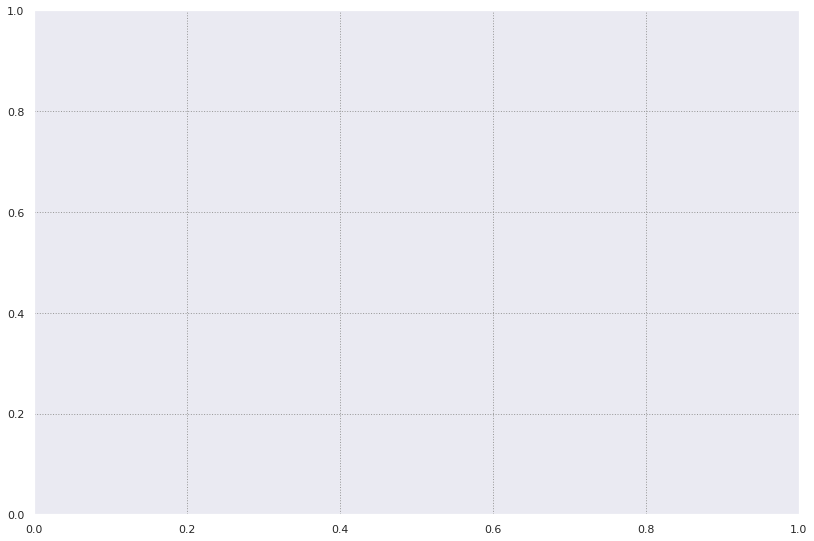

In [167]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()



sns.set(rc={'figure.figsize':(13.7,9.27)})
ax = sns.boxplot(x="ID", y="reads_post_trimming", data=data, color ="#4A60C1")
ax.tick_params(axis='x', rotation=90)
#ax.set_yticklabels(protocol,fontsize = 7)
ax.set_ylabel('Count Reads POST trimming * 10⁶', fontsize = 20)
ax.set_xlabel('Laboratories', fontsize = 20)
ax.set_title('Count Reads POST trimming * 10⁶ vs Laboratories', fontsize = 20)
#ax.set(xlabel='Laboratories', ylabel='Count Reads POST trimming * 10⁶')
plt.show()




fig.savefig('count_reads_post.png',bbox_inches='tight')   # save the figure to file
plt.close(fig)    # close the figure window


ValueError: Could not interpret input 'ID'

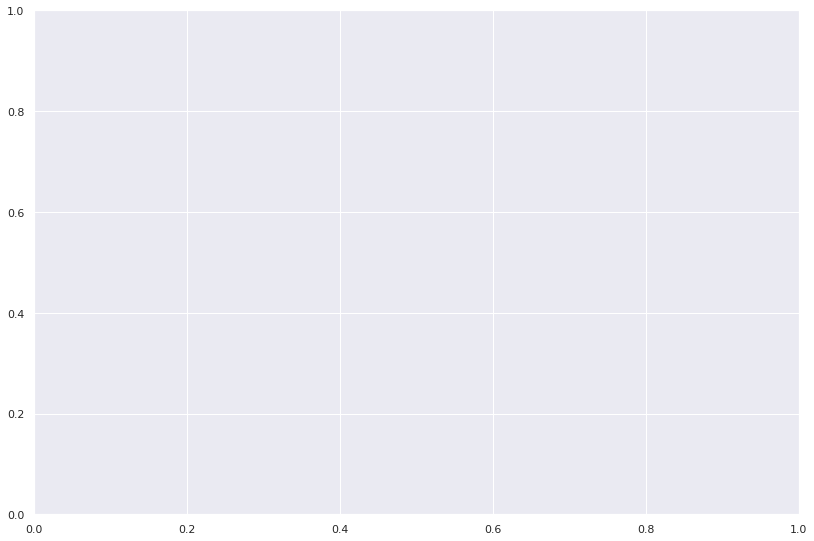

In [168]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()



sns.set(rc={'figure.figsize':(13.7,9.27)})
ax = sns.boxplot(x="ID", y="var_readcount", data=data, color ="#4A60C1")
ax.tick_params(axis='x', rotation=90)
#ax.set_yticklabels(protocol,fontsize = 7)
ax.set_ylabel('Count Reads * 10⁶', fontsize = 20)
ax.set_xlabel('Laboratories', fontsize = 20)
ax.set_title('Count Reads * 10⁶ vs Laboratories', fontsize = 20)
#ax.set(xlabel='Laboratories', ylabel='Count Reads POST trimming * 10⁶')
plt.show()




fig.savefig('count_reads_before.png',bbox_inches='tight')   # save the figure to file
plt.close(fig)    # close the figure window


# Segunda grafica

In [139]:
df

,Sample ID,Protocolo diagnostico SARS-CoV-2,var_protocolo_diagnostico,Variante,Asignacion de Linaje,Version Pango,Valor Ct PCR,Valor Ct N,Valor Ct ORF,Valor Ct S,...,var_qcfiltered,var_readhost,var_readsvirus,var_unmapped,var_QC>10x,var_mean_depth_coverage,var_n_Ns,var_number_variants_75,var_variantseffect,var_referencegenomeaccession
ID,,,,,,,,,,,,,,,,,,,,,
COD_2102,#1,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,B.1.1.7,"20I (Alpha, V1)",2017-01-03 00:00:00,NaN,16.00,19.00,19.00,...,99.900000,0.100000,99.900000,1.000000,99.0000,2877.000000,NaN,36.0,28.0,MN908947
COD_2102,#2,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,B.1.351,"20H (Beta, V2)",2017-01-03 00:00:00,NaN,15.00,18.00,18.00,...,99.900000,0.100000,99.900000,1.000000,99.0000,2800.000000,NaN,28.0,26.0,MN908947
COD_2102,#3,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,A.28,19B,2017-01-03 00:00:00,NaN,18.00,20.00,19.00,...,99.900000,0.100000,99.900000,1.000000,99.0000,2494.000000,NaN,25.0,17.0,MN908947
COD_2102,#4,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,B.1.621,21H (Mu),2017-01-03 00:00:00,NaN,18.00,20.00,21.00,...,99.900000,0.100000,99.900000,1.000000,99.0000,2217.000000,NaN,37.0,28.0,MN908947
COD_2102,#5,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,P.1,"20J (Gamma, V3)",2017-01-03 00:00:00,NaN,18.00,21.00,22.00,...,99.900000,0.100000,99.900000,1.000000,99.0000,1041.000000,NaN,37.0,30.0,MN908947
COD_2102,#6,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,AY.9.2,21I (Delta),2017-01-03 00:00:00,NaN,23.00,26.00,NaN,...,99.900000,0.100000,99.900000,1.000000,99.0000,1818.000000,NaN,37.0,34.0,MN908947
COD_2102,#7,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,None,None,2017-01-03 00:00:00,NaN,23.00,26.00,36.00,...,99.900000,4.800000,95.200000,0.460000,99.0000,13.000000,NaN,NaN,NaN,MN908947
COD_2102,#8,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,AY.94,21J (Delta),2017-01-03 00:00:00,NaN,16.00,19.00,NaN,...,99.900000,0.100000,99.900000,1.000000,99.0000,2013.000000,NaN,44.0,39.0,MN908947
COD_2102,#9,PCR TaqMan ™ 2019-nCoV Assay Kit v1 (referenci...,RT-PCR 2019-nCoV Assay kit,AY.94,21J (Delta),2017-01-03 00:00:00,NaN,14.00,17.00,NaN,...,99.900000,0.100000,99.900000,1.000000,99.0000,1967.000000,NaN,44.0,39.0,MN908947


In [236]:
data = [df["Sample ID"], df["var_readhost"],df["var_readsvirus"],df["var_unmapped"]]

headers = ["sample_id","var_readhost","var_readvirus","var_unmapped"]

df2 = pd.concat(data, axis=1, keys=headers)


In [237]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, COD_2102 to COD_2143
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sample_id      400 non-null    object 
 1   var_readhost   228 non-null    float64
 2   var_readvirus  352 non-null    float64
 3   var_unmapped   310 non-null    float64
dtypes: float64(3), object(1)
memory usage: 31.8+ KB


In [209]:
data = df2.sort_values("var_unmapped",na_position='last')


In [210]:
data

,sample_id,var_readhost,var_readvirus,var_unmapped
ID,,,,
COD_2113,#1,0.000000,0.000000,0.000000
COD_2113,#3,0.000000,0.000000,0.000000
COD_2113,#4,0.000000,0.000000,0.000000
COD_2113,#5,0.000000,0.000000,0.000000
COD_2113,#6,0.000000,0.000000,0.000000
COD_2113,#7,0.000000,0.000000,0.000000
COD_2113,#8,0.000000,0.000000,0.000000
COD_2113,#9,0.000000,0.000000,0.000000
COD_2113,#10,0.000000,0.000000,0.000000


In [220]:
df2['var_unmapped'].max()

63.41

In [177]:
pd.set_option('display.max_rows', None)

In [221]:
select_color = df2.loc[df2["var_unmapped"] == 63.41]

In [222]:
select_color

,sample_id,var_readhost,var_readvirus,var_unmapped
ID,,,,
COD_2114,#7,1.769882,98.230118,63.41


In [240]:
df2.drop(index="COD_2129", inplace = True)

In [224]:
df2['var_readhost'].max()

27.9

In [241]:
data = df2.sort_values("var_unmapped",na_position='last')


In [196]:
data.index

Index(['COD_2117', 'COD_2110', 'COD_2140', 'COD_2105', 'COD_2123', 'COD_2140',
       'COD_2140', 'COD_2125', 'COD_2140', 'COD_2116',
       ...
       'COD_2131', 'COD_2131', 'COD_2131', 'COD_2131', 'COD_2131', 'COD_2131',
       'COD_2131', 'COD_2131', 'COD_2131', 'COD_2131'],
      dtype='object', name='ID', length=380)

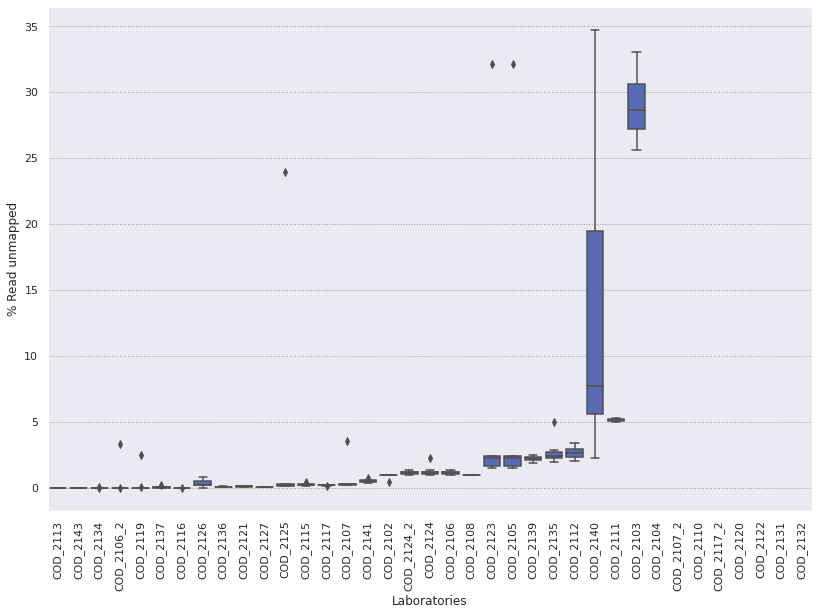

In [242]:

fig, ax = plt.subplots()

#fig.set_size_inches(20, 20)


sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
#sns.set(rc={'figure.figsize':(13.7,9.27)})
ax = sns.boxplot(x=data.index, y="var_unmapped", data=data, color ="#4A60C1" )
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Laboratories', ylabel='% Read unmapped')
plt.show()



fig.savefig('read_unmaped.png',bbox_inches='tight')   # save the figure to file
plt.close(fig)    # close the figure window


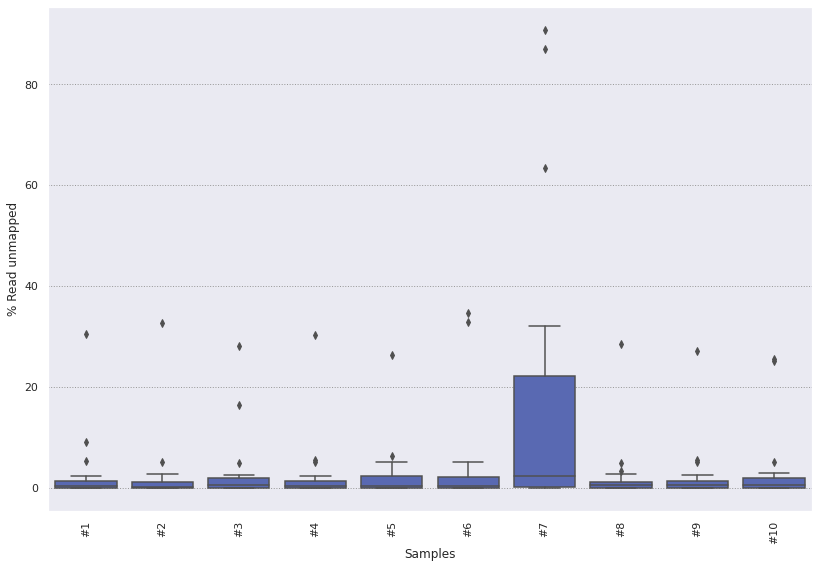

In [234]:

fig, ax = plt.subplots()

#fig.set_size_inches(20, 20)


sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
#sns.set(rc={'figure.figsize':(13.7,9.27)})
ax = sns.boxplot(x="sample_id", y="var_unmapped", data=df2, color ="#4A60C1" )
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Samples', ylabel='% Read unmapped')
plt.show()



fig.savefig('read_unmapped_samples.png',bbox_inches='tight')   # save the figure to file
plt.close(fig)    # close the figure window


In [ ]:

The best way is to interact with the axes object directly

import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()